# QR Decomposition Problem Set

Problem 1

In [34]:
import numpy as np
import scipy 
import scipy.linalg


def qrdecomp(A):
    m,n=np.shape(A)
    Q=np.copy(A)
    Q=Q.astype(float)
    R=np.zeros([n,n])
    for i in range(n):
        R[i,i]=scipy.linalg.norm(Q[:,i])
        Q[:,i]=Q[:,i]/R[i,i]
        for j in range(i+1,n):
            R[i,j]= np.sum(Q[:,j]*Q[:,i])
            Q[:,j]= Q[:,j] - R[i,j]*Q[:,i]
    return Q,R
        
# A=np.random.random((3,3))
A=np.array([1,1,0,1,0,1,0,1,1]).reshape(3,3)
Q,R=qrdecomp(A)
X,Y=scipy.linalg.qr(A, mode='economic')
print("R is upper triangular: ", np.allclose(np.triu(R),R))
print("Q is orthonormal: ",np.allclose((Q.T)@Q, np.identity(3)))
print("QR=A holds: ",np.allclose(Q@R,A))


R is upper triangular:  True
Q is orthonormal:  True
QR=A holds:  True


Problem 2

In [35]:
import numpy as np
import scipy.linalg


def qrdecomp(A):
    m,n=np.shape(A)
    Q=np.copy(A)
    Q=Q.astype(float)
    R=np.zeros([n,n])
    for i in range(n):
        R[i,i]=scipy.linalg.norm(Q[:,i])
        Q[:,i]= (Q[:,i])/R[i,i]
        for j in range(i+1,n):
            R[i,j]= np.sum(Q[:,j]*(Q[:,i]))
            Q[:,j]= Q[:,j] - R[i,j]*Q[:,i]
    return Q,R

def det(A):
    Q,R=qrdecomp(A)
    det=np.product(np.diag(R))
    return det

A=np.array([1,1,0,1,0,1,0,1,1]).reshape(3,3)
x=np.abs(det(A))
y=np.abs(scipy.linalg.det(A))
print('difference in absolute value of determinants by the two methods: ', x-y)

difference in absolute value of determinants by the two methods:  -2.220446049250313e-16


Problem 3

In [36]:
import numpy as np
import scipy.linalg


def qrdecomp(A):
    m,n=np.shape(A)
    Q=np.copy(A)
    Q=Q.astype(float)
    R=np.zeros([n,n])
    for i in range(n):
        R[i,i]=scipy.linalg.norm(Q[:,i])
        Q[:,i]= (Q[:,i])/R[i,i]
        for j in range(i+1,n):
            R[i,j]= np.sum(Q[:,j]*(Q[:,i]))
            Q[:,j]= Q[:,j] - R[i,j]*Q[:,i]
    return Q,R


def linsys(A,b):
    Q,R=qrdecomp(A)
    y= (Q.T)@b.reshape(-1,1)
    x=linear(R,y)
    return x

def linear(R,y):
    n=len(y)
    x=np.empty(n).reshape(-1,1)
    x[n-1]=(1/R[n-1,n-1])*y[n-1]
    for j in range(n-2,-1,-1):
        sum=np.array([])
        for i in range(j+1, n):
            sum=np.append(sum, R[j,i]*x[i])
            sum=np.sum(sum)
        x[j]= ((1/R[j,j])*(y[j]- sum))
    return x 
               
A=np.array([2,3,4,9,-4,30,1,1,-1]).reshape(3,3)
b=np.array([38,161,2])

linsys(A,b)


    
    

array([[3.],
       [4.],
       [5.]])

Problem 4

In [49]:
import numpy as np
import scipy.linalg


def householder(A):
    m,n=np.shape(A)
    R=np.copy(A)
    R=R.astype(float)
    Q=np.identity(m)
    for k in range(n):
        u=np.copy(R[k:,k])
        u=u.astype(float)
        u[0]=u[0]+sign(u[0])*scipy.linalg.norm(u)
        u=u/scipy.linalg.norm(u)
        R[k:,k:]=R[k:,k:]-2*np.outer(u, np.array((np.matrix(u)@ np.matrix(R[k:,k:]))))
        Q[k:,:]=Q[k:,:]-2*np.outer(u, np.array((np.matrix(u)@np.matrix(Q[k:,:]))))
    return Q.T, R

def sign(x):
    sign=1 if x >=0 else -1
    return sign

A=np.random.random((5,3))
Q,R=householder(A)
print(A.shape, Q.shape, R.shape)
L,M = scipy.linalg.qr(A)
print(A.shape, L.shape, R.shape)
np.allclose(Q@R,L@M)

(5, 3) (5, 5) (5, 3)
(5, 3) (5, 5) (5, 3)


True

Problem 5

In [37]:
import numpy as np
import scipy.linalg

def hessenberg(A):
    m,n = np.shape(A)
    H = np.copy(A)
    H= H.astype(float)
    Q=np.identity(m)
    for k in range(n-2):
        u=np.copy(H[k+1:, k])
        u=u.astype(float)
        u[0]=u[0]+sign(u[0])*scipy.linalg.norm(u)
        u=u/scipy.linalg.norm(u)
        H[k+1:,k:] = H[k+1:,k:]-2*np.outer(u, np.array(np.matrix(u)@np.matrix(H[k+1:, k:])))
        H[:,k+1:] = H[:, k+1:] - 2*np.outer(np.array(np.matrix(H[:,k+1:]@np.matrix(u).T)), u)
        Q[k+1:,:] = Q[k+1:,:]- 2*np.outer(u, np.array(np.matrix(u)@np.matrix(Q[k+1:,:])))
    return H,Q.T
        
def sign(x):
    sign=1 if x >=0 else -1
    return sign

A=np.random.random((8,8))
H,Q=scipy.linalg.hessenberg(A, calc_q=True)
L,M=hessenberg(A)
print(np.allclose(np.triu(L,-1),L))
print(np.allclose(M@L@M.T, A))
print(np.allclose(Q@H@Q.T,M@L@M.T))

True
True
True


# Least Squares and Eigenvalues Problem Set

Problem 1

In [38]:
import numpy as np
import scipy.linalg


def qrdecomp(A):
    m,n=np.shape(A)
    Q=np.copy(A)
    Q=Q.astype(float)
    R=np.zeros([n,n])
    for i in range(n):
        R[i,i]=scipy.linalg.norm(Q[:,i])
        Q[:,i]= (Q[:,i])/R[i,i]
        for j in range(i+1,n):
            R[i,j]= np.sum(Q[:,j]*(Q[:,i]))
            Q[:,j]= Q[:,j] - R[i,j]*Q[:,i]
    return Q,R


def linsys(A,b):
    Q,R=qrdecomp(A)
    y= (Q.T)@b.reshape(-1,1)
    x=linear(R,y)
    return x

def linear(R,y):
    n=len(y)
    x=np.empty(n).reshape(-1,1)
    x[n-1]=(1/R[n-1,n-1])*y[n-1]
    for j in range(n-2,-1,-1):
        sum=np.array([])
        for i in range(j+1, n):
            sum=np.append(sum, R[j,i]*x[i])
            sum=np.sum(sum)
        x[j]= ((1/R[j,j])*(y[j]- sum))
    return x 
               
A=np.array([2,1,6,1,20,1,30,1,40,1]).reshape(-1,2)
b=np.array([20,18,10,6,2])

print('The Least Squares Solution is: ')
print(linsys(A,b))



The Least Squares Solution is: 
[[-0.48037677]
 [20.61538462]]


Problem 2

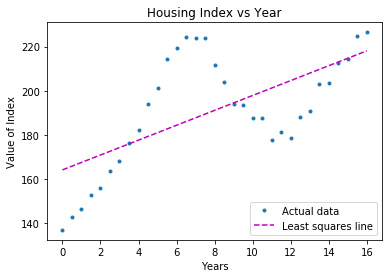

In [33]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

data=np.load('housing.npy')
years=data[:,0]
index=data[:,1]
ones=np.ones(len(years))

A=np.column_stack((ones,years))
b=index

def qrdecomp(A):
    m,n=np.shape(A)
    Q=np.copy(A)
    Q=Q.astype(float)
    R=np.zeros([n,n])
    for i in range(n):
        R[i,i]=scipy.linalg.norm(Q[:,i])
        Q[:,i]= (Q[:,i])/R[i,i]
        for j in range(i+1,n):
            R[i,j]= np.sum(Q[:,j]*(Q[:,i]))
            Q[:,j]= Q[:,j] - R[i,j]*Q[:,i]
    return Q,R


def linsys(A,b):
    Q,R=qrdecomp(A)
    y= (Q.T)@b.reshape(-1,1)
    x=linear(R,y)
    return x

def linear(R,y):
    n=len(y)
    x=np.empty(n).reshape(-1,1)
    x[n-1]=(1/R[n-1,n-1])*y[n-1]
    for j in range(n-2,-1,-1):
        sum=np.array([])
        for i in range(j+1, n):
            sum=np.append(sum, R[j,i]*x[i])
            sum=np.sum(sum)
        x[j]= ((1/R[j,j])*(y[j]- sum))
    return x 

coefficients=linsys(A,b)

plt.plot(years,index, '.', label='Actual data')
plt.plot(years, coefficients[0]+coefficients[1]*years, 'm--', label='Least squares line')
plt.xlabel('Years')
plt.ylabel('Value of Index')
plt.legend(loc='lower right')
plt.title('Housing Index vs Year')
plt.show()


Problem 3

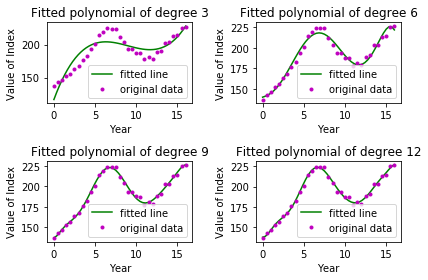

In [23]:
import numpy as np
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt

data=np.load('housing.npy')
years=data[:,0]
index=data[:,1]

for counter,value in enumerate([3,6,9,12]):
    A=np.vander(years, value+1)
    b= index
    x=scipy.linalg.lstsq(A,b)[0]
    f=np.poly1d(x)
    domain=np.linspace(0,16,50)
    plt.subplot(2,2,counter+1)
    plt.plot(domain, f(domain), 'g', label = 'fitted line')
    plt.plot(years, index, 'm.', label='original data')
    plt.legend()
    plt.title('Fitted polynomial of degree ' + str(value))
    plt.xlabel('Year')
    plt.ylabel('Value of Index')
plt.tight_layout()
plt.show()
    


Problem 4

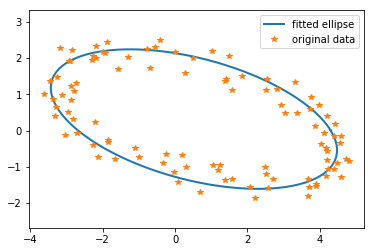

In [39]:
import numpy as np
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt

def plotellipse(a,b,c,d,e):
    theta=np.linspace(0,2*np.pi, 200)
    cos_t,sin_t=np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A)) / (2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2, label="fitted ellipse")
    plt.gca().set_aspect("equal", "datalim")

data=np.load('ellipse.npy')
x=data[:,0]
y=data[:,1]
y2=y*y
xy=x*y
x2=x*x
A=np.column_stack((x2,x,xy,y,y2))
b=np.ones(len(x))

coeff=scipy.linalg.lstsq(A,b)[0]
plotellipse(coeff[0], coeff[1], coeff[2], coeff[3], coeff[4])
plt.plot(x,y,'*', label="original data")
plt.legend()
plt.show()



   
    



Problem 5

In [171]:
import numpy as np
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt


def eigen(A,N):
    m,n = np.shape(A)
    x=[None]*(N+1)
    x[0]=np.random.random(n)
    x[0]=x[0]
    x[0]=x[0]/scipy.linalg.norm(x[0])
    for k in range(N):
        matrix=(np.matrix(A)@(np.matrix(x[k]).T)).T
        x[k+1]=np.asarray(matrix).reshape(-1)
        x[k+1]=x[k+1]/scipy.linalg.norm(x[k+1])
    eigenvalue=np.float((np.matrix(x[N]))@(np.matrix(A))@(np.matrix(x[N]).T))
    return eigenvalue,x[N]

A=np.random.random((20,20))
eigenvalue, eigenvector=eigen(A,1000)
print('Whether Ax=lambda*x holds: ', np.allclose(A@eigenvector,eigenvalue*eigenvector))

eigs,vecs=scipy.linalg.eig(A)
loc=np.argmax(eigs)
lamb,x=eigs[loc], vecs[:,loc]
print('Whether eigenvalues calculated from both methods match: ', np.allclose(eigenvalue, lamb))
print('Whether eigenvectors calculated from both methods match: ', np.allclose(eigenvector, np.asarray(x).reshape(-1)))




Whether Ax=lambda*x holds:  True
Whether eigenvalues calculated from both methods match:  True
Whether eigenvectors calculated from both methods match:  True


Problem 6

In [198]:
import cmath
import numpy as np
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt

tol=1**(-1000)

def qr(A,N):
    m,n=np.shape(A)
#     S= scipy.linalg.hessenberg(A)
    S=hessenberg(A)[0]
    for k in range(N):
        Q,R=qrdecomp(S)
#         Q,R=scipy.linalg.qr(S)
        S=R@Q
    eigs=[]
    i=0
    while i < n: 
        if S[i,i]==S[-1,-1] or np.abs(S[i+1,i]) < tol:
            eigs.append(S[i,i])
        else:
            a=S[i,i]
            d=S[i+1,i+1]
            b=S[i,i+1]
            c=S[i+1,i]
            eig1=((a+d)+cmath.sqrt(((a+d)**2)-4*(a*d-b*c)))/2
            eig2=eig1.conjugate()
#             eig2=((a+d)-cmath.sqrt(((a+d)**2)-4*(a*d-b*c)))/2
            eigs.append(eig1)
            eigs.append(eig2)
            i=i+1
        i=i+1
    return eigs

def hessenberg(A):
    m,n = np.shape(A)
    H = np.copy(A)
    H= H.astype(float)
    Q=np.identity(m)
    for k in range(n-2):
        u=np.copy(H[k+1:, k])
        u=u.astype(float)
        u[0]=u[0]+sign(u[0])*scipy.linalg.norm(u)
        u=u/scipy.linalg.norm(u)
        H[k+1:,k:] = H[k+1:,k:]-2*np.outer(u, np.array(np.matrix(u)@np.matrix(H[k+1:, k:])))
        H[:,k+1:] = H[:, k+1:] - 2*np.outer(np.array(np.matrix(H[:,k+1:]@np.matrix(u).T)), u)
        Q[k+1:,:] = Q[k+1:,:]- 2*np.outer(u, np.array(np.matrix(u)@np.matrix(Q[k+1:,:])))
    return H,Q.T
        
def sign(x):
    sign=1 if x >=0 else -1
    return sign


def qrdecomp(A):
    m,n=np.shape(A)
    Q=np.copy(A)
    Q=Q.astype(float)
    R=np.zeros([n,n])
    for i in range(n):
        R[i,i]=scipy.linalg.norm(Q[:,i])
        Q[:,i]= (Q[:,i])/R[i,i]
        for j in range(i+1,n):
            R[i,j]= np.sum(Q[:,j]*(Q[:,i]))
            Q[:,j]= Q[:,j] - R[i,j]*Q[:,i]
    return Q,R



B=np.random.random((4,4))
BT=B.T
# print(B,BT)
A=B+BT
N=20000
eigenval=qr(A,N)
eigs, vecs=scipy.linalg.eig(A)
print(eigenval)
print(eigs)

[3.653033379802954, -1.1479940079069604, 0.9108901539502308, 0.00788764984373062]
[ 3.65303338+0.j -1.14799401+0.j  0.91089015+0.j  0.00788765+0.j]


# SVD Image Compress Problem Set

Problem 1

In [13]:
import cmath
import numpy as np
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt

def compact_svd(A,tol):
    AH=A.conj().T
    eigs,vecs=scipy.linalg.eig(AH@A)
    print(vecs)
    sigma=np.sqrt(eigs)
    indices=np.argsort(-sigma)
    sigmasorted=sigma[indices]
    vecsorted=np.empty((np.shape(vecs)))
    for count, value in enumerate(indices):
        vecsorted[:,count]=vecs[:,value]
    sigma=sigmasorted
    vecs=vecsorted
    r=np.count_nonzero(sigma)
    sigma1=sigma[:r]
    V1=vecs[:,:r]
    row,column=np.shape(V1)
    U1=np.zeros((row,column))
    for i in range(column):
          U1[:,i]=(1/sigma1[i])*np.asarray((np.matrix(A)@(np.matrix(V1[:,i]).T))).reshape(-1)
    return U1,sigma1,V1.conj().T

A=np.random.random((5,5))
tol=10**(-12)
U1,sigma1,VH= compact_svd(A,tol)

print('Whether U is orthonormal holds: ', np.allclose((U1.T)@U1, np.identity(5)))
print('Whether U*sigma*VH=A holds: ', np.allclose(U1@np.diag(sigma1)@VH,A))
print('Whether rank is correct: ', np.linalg.matrix_rank(A)==len(sigma1))
        
    

[[-0.43193871 -0.87202107 -0.0279869  -0.22808942  0.01414795]
 [-0.48619866  0.04828407 -0.36462876  0.78682803  0.09605746]
 [-0.23343208  0.12544466 -0.10475127 -0.0839131  -0.95486065]
 [-0.53113554  0.4269176  -0.37704653 -0.5629158   0.27676365]
 [-0.49035122  0.19812348  0.84446769  0.07043627  0.04707247]]
Whether U is orthonormal holds:  True
Whether U*sigma*VH=A holds:  True
Whether rank is correct:  True


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


Problem 2

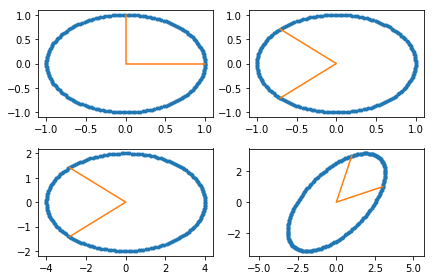

In [83]:
import cmath
import numpy as np
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt

def func(A):
    theta=np.linspace(0,2*np.pi,200)
    x=np.cos(theta)
    y=np.sin(theta)
    E=np.array([1,0,0,0,0,1]).reshape(2,3)
    S=np.empty((2,len(y)))
    S[0,:]=x
    S[1,:]=y
    fig,ax=plt.subplots(2,2)
    ax[0,0].plot(S[0,:], S[1,:], '.')
    ax[0,0].plot(E[0,:], E[1,:], '-')
    U,sigma,VH=scipy.linalg.svd(A, full_matrices=True)
    sigma=sigma*np.eye(2)
    VHS=VH@S
    VHE=VH@E
    ax[0,1].plot(VHS[0,:], VHS[1,:], '.')
    ax[0,1].plot(VHE[0,:], VHE[1,:], '-')
    sigmaVHS=sigma@VH@S
    sigmaVHE=sigma@VH@E
    ax[1,0].plot(sigmaVHS[0,:], sigmaVHS[1,:], '.')
    ax[1,0].plot(sigmaVHE[0,:], sigmaVHE[1,:], '-')
    UsigmaVHS=U@sigma@VH@S
    UsigmaVHE=U@sigma@VH@E
    ax[1,1].plot(UsigmaVHS[0,:], UsigmaVHS[1,:], '.')
    ax[1,1].plot(UsigmaVHE[0,:], UsigmaVHE[1,:], '-')
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()
    
    

A=np.array([3,1,1,3]).reshape(2,2)
func(A)
   






Problem 3

In [116]:
import cmath
import numpy as np
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt

def approximation(A,s):
    U,sigma,VH=scipy.linalg.svd(A, full_matrices=False)
    U_hat=U[:,:s]
    sigma_hat=sigma[:s]*np.eye(len(sigma[:s]))
    VH_hat=VH[:s, :]
    A_hat=U_hat@sigma_hat@VH_hat
    return U_hat, sigma_hat, VH_hat

A=np.random.random((20,20))
s=4
U_hat, sigma_hat, VH_hat=approximation(A,s)

size1=np.size(U_hat)
size2=np.size(VH_hat)
size3=np.size(np.diag(sigma_hat))
size=size1+size2+size3
print(size)
print('There is an error because s>rank(A): ', s>np.linalg.matrix_rank(A))


164
There is an error because s>rank(A):  False


Problem 4

In [128]:
import cmath
import numpy as np
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt

def func(A,epsilon):
    U,sigma,VH=scipy.linalg.svd(A, full_matrices=False)
    sigma=sigma[np.argsort(-sigma)]
    sigma_hat=sigma[np.where(sigma<epsilon)]
    sigma_hat=sigma_hat[:-1]
    sigma_hat=sigma_hat[:s]*np.eye(len(sigma_hat[:s]))
    U_hat=U[:,:s]
    VH_hat=VH[:s, :]
    A_hat=U_hat@sigma_hat@VH_hat
    return U_hat, sigma_hat, VH_hat

A=np.random.random((15,15))
U,sig,V=func(A,3)

size1=np.size(U)
size2=np.size(V)
size3=np.size(np.diag(sig))
size=size1+size2+size3
print(size)
print('There is an error because s>rank(A): ', s>np.linalg.matrix_rank(A))


124
There is an error because s>rank(A):  False


Problem 5

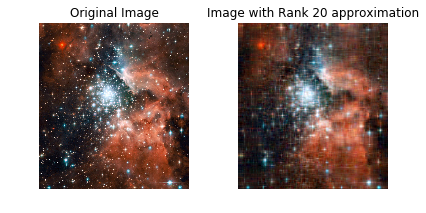

In [169]:
import cmath
import numpy as np
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt

def function(file,s):
    image=plt.imread(file)/255
    R=image[:,:,0]
    G=image[:,:,1]
    B=image[:,:,2]
    R_hat=approximation(R,s)
    R_hat=np.clip(R_hat, 0,1)
    G_hat=approximation(G,s)
    G_hat=np.clip(G_hat, 0,1)
    B_hat=approximation(B,s)
    B_hat=np.clip(B_hat, 0,1)
    image_hat=np.dstack((R_hat,G_hat,B_hat))
    plt.subplot(121)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(image_hat)
    plt.title('Image with Rank 20 approximation')
    plt.axis("off")
    plt.tight_layout()
    plt.show()

def approximation(A,s):
    U,sigma,VH=scipy.linalg.svd(A, full_matrices=False)
    U_hat=U[:,:s]
    sigma_hat=sigma[:s]*np.eye(len(sigma[:s]))
    VH_hat=VH[:s, :]
    A_hat=U_hat@sigma_hat@VH_hat
    return A_hat

function("hubble.jpg",20)    


# Drazin Inverse Problem Set

Problem 1

In [163]:
import cmath
import numpy as np
import numpy.linalg
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt

def drazin(A,k,AD):
    AAD=A@AD
    ADA=AD@A
    Akp1AD=np.linalg.matrix_power(A,k+1)
    Ak=np.linalg.matrix_power(A,k)
    ADAAD=AD@A@A@AD
    print('Whether first condition is met: ', np.allclose(AAD,ADA))
    print('Whether second condition is met: ', np.allclose(Akp1AD,Ak))
    print('Whether third condition is met: ', np.allclose(ADAAD,AD))

A=np.array([[1,3,0,0],[0,1,3,0], [0,0,1,3], [0,0,0,0]])
AD=np.array([[1,-3,9,81], [0,1,-3,-18], [0,0,1,3], [0,0,0,0]])
drazin(A,1,AD)

B=np.array([[1,1,3], [5,2,6], [-2,-1,-3]])
BD=np.zeros((3,3))
drazin(B,3,BD)


Whether first condition is met:  True
Whether second condition is met:  False
Whether third condition is met:  False
Whether first condition is met:  True
Whether second condition is met:  True
Whether third condition is met:  True


Problem 2

In [171]:
import numpy as np
import numpy.linalg
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt

def drazininv(A,tol):
    n,n = np.shape(A)
    f=lambda x: abs(x)>tol
    g=lambda x: abs(x)<=tol
    Q1,S,k1=scipy.linalg.schur(A, sort=f)
    Q2,T,k2=scipy.linalg.schur(A, sort=g)
    U= np.concatenate((S[:,:k1], T[:,:n-k1]), axis=1)
    Uinv=scipy.linalg.inv(U)
    V=Uinv@A@U
    Z=np.zeros((n,n))
    Z=Z.astype(float)
    if k1 !=0:
        Minv=scipy.linalg.inv(V[:k1, :k1])
        Z[:k1, :k1] = Minv
    return U@Z@Uinv

B=np.array([[1,1,3], [5,2,6], [-2,-1,-3]])
tol=10**(-2)

drazininv(B,tol)


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Problem 3

In [190]:
import numpy as np
import numpy.linalg
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt

tol = 10**(-2)
def drazininv(A,tol):
    n,n = np.shape(A)
    f=lambda x: abs(x)>tol
    g=lambda x: abs(x)<=tol
    Q1,S,k1=scipy.linalg.schur(A, sort=f)
    Q2,T,k2=scipy.linalg.schur(A, sort=g)
    U= np.concatenate((S[:,:k1], T[:,:n-k1]), axis=1)
    Uinv=scipy.linalg.inv(U)
    V=Uinv@A@U
    Z=np.zeros((n,n))
    Z=Z.astype(float)
    if k1 !=0:
        Minv=scipy.linalg.inv(V[:k1, :k1])
        Z[:k1, :k1] = Minv
    return U@Z@Uinv

def effres(A):
    n,n=A.shape
    D=np.zeros((n,n))
    for i in range(n):
        D[i,i]=np.sum(A[i,:])
    L=D-A
    R=np.empty((n,n))
    identity=np.identity(n)
    for j in range(n):
        L_prime=np.copy(L)
        L_prime[j,:]=identity[j,:]
        drazinL_prime=drazininv(L_prime, tol)
        R[:, j]=np.diag(drazinL_prime)
    for k in range(n):
        R[k,k]=0
    return R

AG1  = np.matrix([[0,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0]])
AG2 =np.matrix([[0,1],[1,0]])
AG3 = np.matrix([[0,1,1],[1,0,1],[1,1,0]])
AG4 =  np.matrix([[0,3],[3,0]])
AG5 = np.matrix([[0,2],[2,0]])
AG6 = np.matrix([[0,4],[4,0]])

effres(AG1)

array([[0., 1., 2., 3.],
       [1., 0., 1., 2.],
       [2., 1., 0., 1.],
       [3., 2., 1., 0.]])

Problem 4

In [265]:
import pandas as pd
import numpy as np
import numpy.linalg
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt
import itertools
from itertools import count

data=pd.read_csv('social_network.csv', header=-1)
names1=pd.Series.unique(data[0])
names2=pd.Series.unique(data[1])
links=data.values
links
mergedlist=list(itertools.chain.from_iterable(links))
mergedlist
mydict={}
i = 0
for item in mergedlist:
    if(i>0 and item in mydict):
        continue
    else:    
       i = i+1
       mydict[item] = i

k=[]
for item in mergedlist:
    k.append(mydict[item])



{'Piers': 1,
 'Abigail': 2,
 'Oliver': 3,
 'Stephanie': 4,
 'Carol': 5,
 'Melanie': 6,
 'Stephen': 7,
 'Sally': 8,
 'Penelope': 9,
 'Alan': 10,
 'Trevor': 11,
 'Jake': 12,
 'Mary': 13,
 'Anna': 14,
 'Connor': 15,
 'John': 16,
 'Eric': 17,
 'Paul': 18,
 'Colin': 19,
 'Jane': 20,
 'Thomas': 21,
 'Christopher': 22,
 'Charles': 23,
 'Brandon': 24,
 'Madeleine': 25,
 'Tracey': 26,
 'Sonia': 27,
 'Ruth': 28,
 'Evan': 29,
 'Max': 30,
 'Theresa': 31,
 'Alexander': 32,
 'Emily': 33}

# Conditioning and Stability Problem Set

Problem 1

In [16]:
import pandas as pd
import numpy as np
import numpy.linalg
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt
import itertools
from itertools import count


def condition(A):
    sigma=scipy.linalg.svd(A)[1]
    sigmamax=np.max(sigma)
    sigmamin=np.min(sigma)
    if sigmamin==0:
        sigmamin=np.inf
    return sigmamax/sigmamin

A=np.random.random((5,5))
Q=scipy.linalg.qr(A)[0]
condition(Q)




1.0000000000000002

Problem 2

Absolute condition number is:  3.73302321369207e-9
Relative condition number is:  2576487779.82846


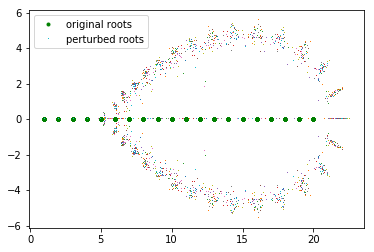

In [2]:
import sympy as sy
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

def perturb():
    k=[]
    rel_k=[]
    for i in range(99):
        w_roots=np.arange(1,21)
        x,i=sy.symbols('x i')
        w=sy.poly_from_expr(sy.product(x-i, (i,1,20)))[0]
        w_coeffs=np.array(w.all_coeffs())
        r=np.random.normal(loc=1, scale=10**-10, size=len(w_coeffs))
        w_coeffs_new=w_coeffs*r
        w_roots_new=np.roots(np.poly1d(w_coeffs_new))
        w_roots=np.sort(w_roots)
        w_roots_new=np.sort(w_roots_new)
        w_roots_real=np.real(w_roots)
        w_roots_imag=np.imag(w_roots)
        w_roots_new_real=np.real(w_roots_new)
        w_roots_new_imag=np.imag(w_roots_new)
        h=w_coeffs-w_coeffs_new
        k.append(scipy.linalg.norm(w_roots_new - w_roots, np.inf)/scipy.linalg.norm(h, np.inf))
        rel_k.append(k[-1]*scipy.linalg.norm(w_coeffs, np.inf)/scipy.linalg.norm(w_roots, np.inf))
        plt.plot(w_roots_real, w_roots_imag, 'g.')
        plt.plot(w_roots_new_real, w_roots_new_imag, ',')
    plt.plot(w_roots_real, w_roots_imag, 'g.', label='original roots')
    plt.plot(w_roots_new_real, w_roots_new_imag, ',', label='perturbed roots')
    k.append(scipy.linalg.norm(w_roots_new - w_roots, np.inf)/scipy.linalg.norm(h, np.inf))
    rel_k.append(k[-1]*scipy.linalg.norm(w_coeffs, np.inf)/scipy.linalg.norm(w_roots, np.inf))
    print('Absolute condition number is: ', np.mean(k))
    print('Relative condition number is: ', np.mean(rel_k))
    plt.legend()
    plt.show()
    
perturb()
        
    
        
        




Problem 3

In [57]:
import sympy as sy
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

def condition(A):
    reals=np.random.normal(0, 1e-10, A.shape)
    imags=np.random.normal(0, 1e-10, A.shape)
    H= reals+ 1j*imags
    A_new=A+H
    lambs=scipy.linalg.eigvals(A)
    lambs_new=scipy.linalg.eigvals(A_new)
    numer=scipy.linalg.norm(lambs-lambs_new, 2)
    denom=scipy.linalg.norm(H, 2)
    k=numer/denom
    k_A=k*(scipy.linalg.norm(A,2)/scipy.linalg.norm(lambs,2))
    return k,k_A

A=np.random.random((4,4))
condition(A)


(0.8728706289244925, 0.9020052098309268)

Problem 4

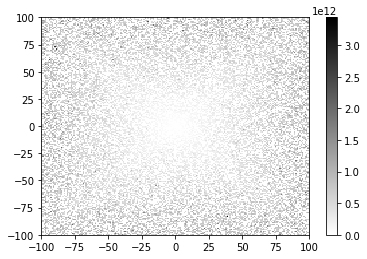

In [60]:
import sympy as sy
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

def condition(A):
    reals=np.random.normal(0, 1e-10, A.shape)
    imags=np.random.normal(0, 1e-10, A.shape)
    H= reals+ 1j*imags
    A_new=A+H
    lambs=scipy.linalg.eigvals(A)
    lambs_new=scipy.linalg.eigvals(A_new)
    numer=scipy.linalg.norm(lambs-lambs_new, 2)
    denom=scipy.linalg.norm(H, 2)
    k=numer/denom
    k_A=k*(scipy.linalg.norm(A,2)/scipy.linalg.norm(lambs,2))
    return k,k_A

def color(xmin,xmax, ymin, ymax, res):
    x= np.linspace(xmin, xmax,res)
    y= np.linspace(ymin, ymax, res)
    xx,yy=np.meshgrid(x,y)
    k_A = np.empty((len(x), len(y)))
    for count1,value1 in enumerate(x):
        for count2,value2 in enumerate(y):
            A = np.array([1,value1,value2,1]).reshape(2,2)
            k_A[count1,count2]=condition(A)[1]
    return k_A,xx,yy
k_A,xx,yy=color(-100,100,-100,100,200)
plt.pcolormesh(xx,yy,k_A, cmap='gray_r')
plt.colorbar()
plt.show()
    

Problem 5

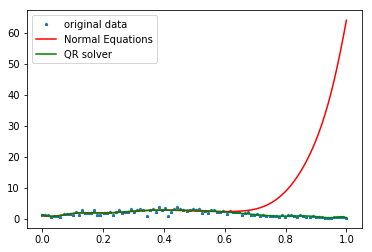

The forward errors are:  152.14373083729365 5.4330612351913444e-08


In [99]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

def stability(n):
    xk,yk=np.load('stability_data.npy').T
    A=np.vander(xk, n+1)
    b=yk
    soln1 = scipy.linalg.inv(A.T@A)@A.T@b
    Q,R = scipy.linalg.qr(A, mode='economic')
    A1=R
    b1=Q.T@b
    soln2 = scipy.linalg.solve_triangular(A1,b1)
    f1 = np.poly1d(soln1)
    f2 = np.poly1d(soln2)
    plt.plot(xk,yk, '*', markersize='3',label='original data')
    plt.plot(xk,f1(xk), 'r-', label = 'Normal Equations')
    plt.plot(xk,f2(xk), 'g-', label='QR solver')
    plt.legend()
    plt.show()
    fe1 = scipy.linalg.norm(A@soln1-b)
    fe2 = scipy.linalg.norm(A1@soln2-b1)
    return fe1, fe2
 
fe1, fe2= stability(14)
print('The forward errors are: ', fe1, fe2)

Problem 6

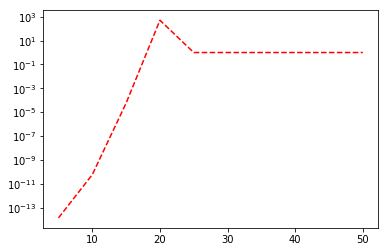

In [6]:
import math
def cat_can():
    nvals = np.arange(5,55,5)
    x = sy.Symbol('x')
    err = []
    for i in nvals:
        con_integral = sy.integrate(x**i * sy.exp(x - 1), (x, 0, 1))
        d_integral = (-1)**i * sy.subfactorial(i) + (-1)**(i + 1) * sy.factorial(i) / math.e
        err.append(abs(d_integral - con_integral) / abs(con_integral))
    plt.plot(nvals, err,'r--')
    plt.yscale('log')
sy.integrate

cat_can()

# Page Rank Algorithm Problem Set

Problem 1

[0 1 3 3 3 4 4 4 5 5 6 7]
[[0 7]
 [1 0]
 [3 0]
 [3 2]
 [3 6]
 [4 0]
 [4 5]
 [4 6]
 [5 0]
 [5 6]
 [6 0]
 [7 0]]


IndexError: too many indices for array

Problem 2

In [126]:
import numpy as np
import scipy.linalg

def K_givenA(A):
    n,n = np.shape(A)
    B = np.empty((n,n))
    diagonals = np.empty(n)
    for i in range(n):
        if any(A[i,:])==0:
            B[i,:]=1
        else:
            B[i,:]=A[i,:]
        diagonals[i] = np.sum(B, axis=1)[i]
    D = np.eye(n)*diagonals
    Dinv=scipy.linalg.inv(D)
    K = (Dinv@B).T
    return K    

A = np.array([0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0, 1,0,1,0,0,0,1,0, 1,0,0,0,0,1,1,0, 1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0]).reshape(8,8)
K_givenA(A)
  


array([[0.        , 1.        , 0.125     , 0.33333333, 0.33333333,
        0.5       , 1.        , 1.        ],
       [0.        , 0.        , 0.125     , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.125     , 0.33333333, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.125     , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.125     , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.125     , 0.        , 0.33333333,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.125     , 0.33333333, 0.33333333,
        0.5       , 0.        , 0.        ],
       [1.        , 0.        , 0.125     , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

Problem 3

In [131]:
import numpy as np
import scipy.linalg

N = None
d = 0.85
tol = 1e-5
iter_max=100

def K_givenA(A):
    n,n = np.shape(A)
    B = np.empty((n,n))
    diagonals = np.empty(n)
    for i in range(n):
        if any(A[i,:])==0:
            B[i,:]=1
        else:
            B[i,:]=A[i,:]
        diagonals[i] = np.sum(B, axis=1)[i]
    D = np.eye(n)*diagonals
    Dinv=scipy.linalg.inv(D)
    K = (Dinv@B).T
    return K  

def iterative(A,N,d,tol):
    n,n = np.shape(A)
    pt = np.random.random(n)
    ones = np.ones(n)
    K=K_givenA(A)
    iter = 0
    dist=5
    while (iter<iter_max)& (dist>tol):
        pt1 = d*np.asarray(np.matrix(K)@np.matrix(pt).T).reshape(-1) + ((1-d)/n)*ones
        dist = scipy.linalg.norm(pt1-pt)
        pt = pt1
        iter +=1
    return pt1

A  = np.array([0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0, 1,0,1,0,0,0,1,0, 
               1,0,0,0,0,1,1,0, 1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0]).reshape(8,8)
iterative(A,N,d,tol)

array([0.43870391, 0.02171029, 0.02786154, 0.02171029, 0.02171029,
       0.02786154, 0.04585394, 0.39460445])

Problem 4

In [136]:
import numpy as np
import scipy.linalg

N= None
d=0.85
tole=1e-15
iter_max=100

def eigen(A,N):
    m,n = np.shape(A)
    x=[None]*(N+1)
    x[0]=np.random.random(n)
    x[0]=x[0]
    x[0]=x[0]/scipy.linalg.norm(x[0])
    for k in range(N):
        matrix=(np.matrix(A)@(np.matrix(x[k]).T)).T
        x[k+1]=np.asarray(matrix).reshape(-1)
        x[k+1]=x[k+1]/scipy.linalg.norm(x[k+1])
    eigenvalue=np.float((np.matrix(x[N]))@(np.matrix(A))@(np.matrix(x[N]).T))
    return eigenvalue,x[N]


def iterationmatrix(A,N,d,tol):
    n,n = np.shape(A)
    K = K_givenA(A)
    E = np.ones((n,n))
    B = d*K + ((1-d)/n)*E
    p = scipy.linalg.solve(np.eye(n) - d * K, ((1 - d) / n) * np.ones(n))
    return p

A  = np.array([0,0,0,0,0,0,0,1, 1,0,0,0,0,0,0,0, 0,0,0,0,0,0,0,0, 1,0,1,0,0,0,1,0, 
               1,0,0,0,0,1,1,0, 1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0, 1,0,0,0,0,0,0,0]).reshape(8,8)
iterationmatrix(A,N,d,tol)
        
    


array([0.43869288, 0.02171029, 0.02786154, 0.02171029, 0.02171029,
       0.02786154, 0.04585394, 0.39459924])

Problem 5

In [5]:
import numpy as np
import scipy.linalg
import pandas as pd

iter_max=100

def K_givenA(A):
    n,n = np.shape(A)
    B = np.empty((n,n))
    diagonals = np.empty(n)
    for i in range(n):
        if any(A[i,:])==0:
            B[i,:]=1
        else:
            B[i,:]=A[i,:]
        diagonals[i] = np.sum(B, axis=1)[i]
    D = np.eye(n)*diagonals
    Dinv=scipy.linalg.inv(D)
    K = (Dinv@B).T
    return K  

def iterative(A,N,d,tol):
    n,n = np.shape(A)
    pt = np.random.random(n)
    ones = np.ones(n)
    K=K_givenA(A)
    iter = 0
    dist=5
    while (iter<iter_max)& (dist>tol):
        pt1 = d*np.asarray(np.matrix(K)@np.matrix(pt).T).reshape(-1) + ((1-d)/n)*ones
        dist = scipy.linalg.norm(pt1-pt)
        pt = pt1
        iter +=1
    return pt1


ncaa = pd.read_csv('ncaa2013.csv', header = 0).as_matrix()
m, n = ncaa.shape
teams, idx = np.unique(ncaa, return_inverse = True)
idx = idx.reshape((m, n))

t = len(teams)
Adj = np.zeros((t,t))

for i in range(m):
    Adj[idx[i, 1], idx[i, 0]] = 1

ranks = iterative(Adj,N=None, d = 0.7, tol =1e-5)
np.argsort(ranks.T)
ranks = teams[np.argsort(ranks.T)].T[::-1]

print('The top 5 ranked teams are, in order:')
for i in range(5):
    print(ranks[i][0])

The top 5 ranked teams are, in order:
D
B
L
I
I


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
